<a href="https://colab.research.google.com/github/btalbr01/MLA_BTA/blob/main/MLA5_BTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Assignment 5<br>
Ben Albright<br>
CS430-ON<br>
Machine Learning in the Cloud

Standard Imports

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Imports for Ensemble Learning and Random Forests

In [71]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

Other Classifiers

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Imports for Splitting Data and Building Pipeline

In [73]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [74]:
from sklearn import set_config
set_config(display='diagram')

Imports for Performance Measures

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Acquire Data

In [76]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/landsat_test.csv')

Statistics and Visual Exploration

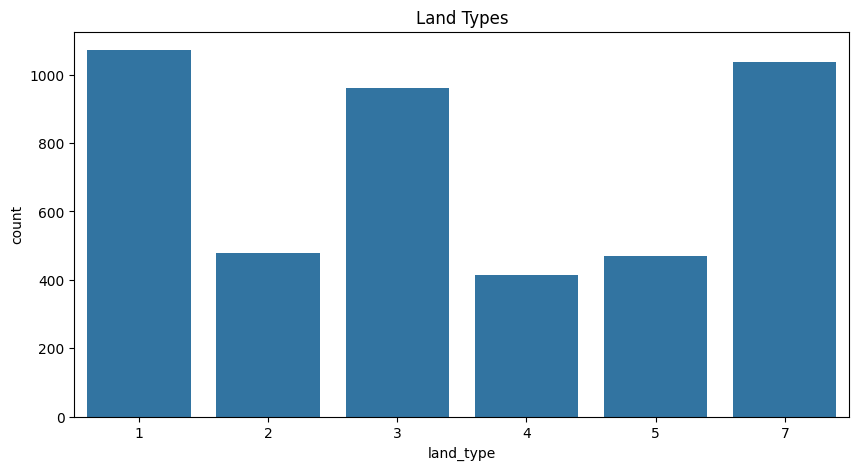

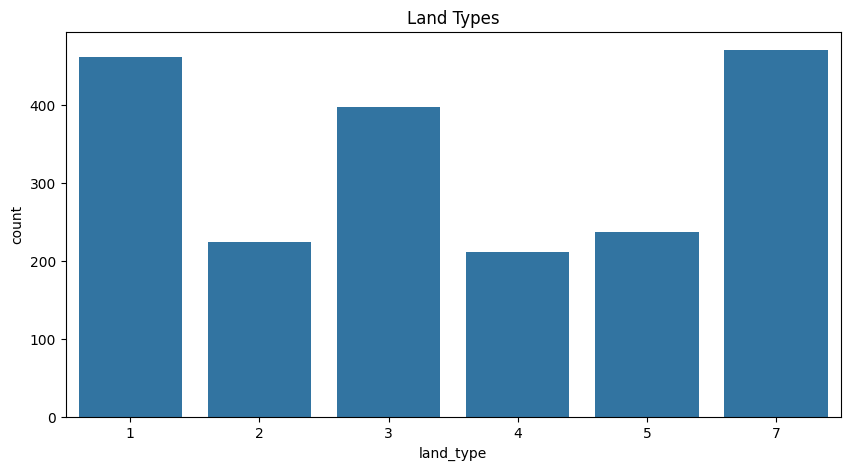

In [77]:
plt.figure(figsize=(10, 5))
sns.countplot(x='land_type', data=landsat_train)
plt.title('Land Types')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='land_type', data=landsat_test)
plt.title('Land Types')
plt.show()

Splitting Data into Train/Test

In [78]:
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [79]:
X_train = landsat_train.iloc[:,0:-1]
X_test = landsat_test.iloc[:,0:-1]
y_train = landsat_train[['land_type']]
y_test = landsat_test[['land_type']]

Building the Pipeline

In [80]:
num_attribs = landsat_train.columns[0:-1]
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(), num_attribs),]
                  )

In [81]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('rf',RandomForestClassifier(n_estimators=1000, max_samples=500, bootstrap=True))
                     ])

Executing the Model

In [82]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middle_l...
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('rf',
                 RandomForestClassifier(max_samples=500, n_estimators=1000))])

Evaluating the Model

In [83]:
y_pred = pipeline.predict(X_test)

              precision    recall  f1-score   support

           1       0.94      0.99      0.96       461
           2       0.98      0.95      0.97       224
           3       0.86      0.95      0.91       397
           4       0.74      0.59      0.66       211
           5       0.90      0.77      0.83       237
           7       0.84      0.87      0.86       470

    accuracy                           0.88      2000
   macro avg       0.88      0.85      0.86      2000
weighted avg       0.88      0.88      0.88      2000



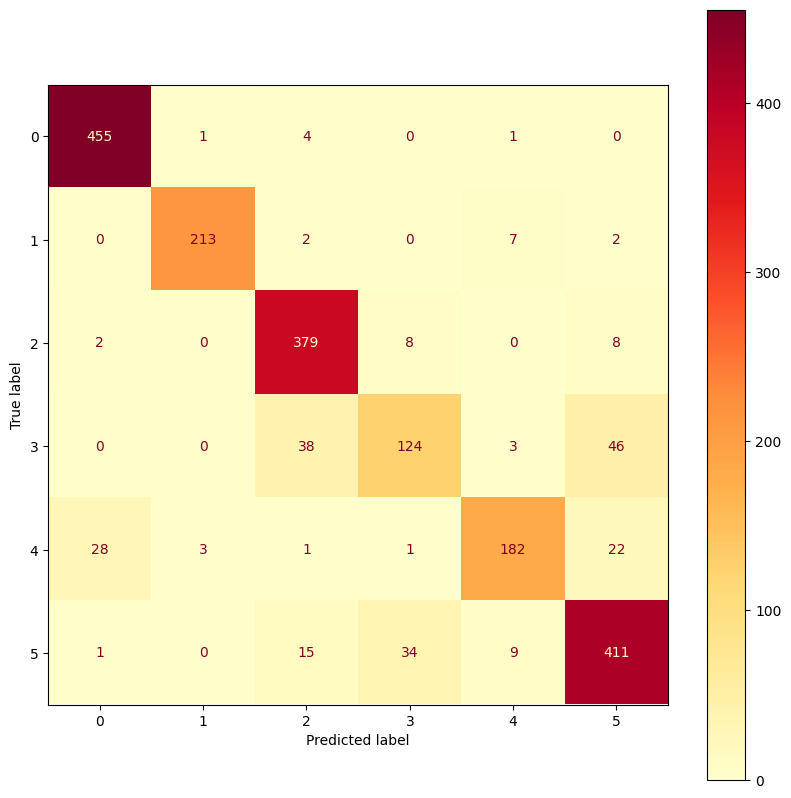

In [84]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fix, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap = 'YlOrRd')

This model seems relatively accurate with a score of 88%. Most of the models have high scores, other than 4, which is very low by comparison.

Problem 2

Bagging Classifier

In [85]:
bagging = Pipeline([
                     ('transform', col_transform),
                     ('bagging',BaggingClassifier(DecisionTreeClassifier(),n_estimators=100, max_samples=500, bootstrap=True, n_jobs=-1))
                     ])

In [86]:
bagging.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middle_l...
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object'))])),
                ('bagging',
                 BaggingClassifier(estimator=DecisionTreeClassifier(),
                                   max_samples=500, n_estimators=100,
                                   n_jobs=-1))])

In [87]:
y_pred = bagging.predict(X_test)

              precision    recall  f1-score   support

           1       0.94      0.98      0.96       461
           2       0.99      0.95      0.97       224
           3       0.87      0.94      0.91       397
           4       0.69      0.59      0.64       211
           5       0.89      0.78      0.83       237
           7       0.84      0.86      0.85       470

    accuracy                           0.88      2000
   macro avg       0.87      0.85      0.86      2000
weighted avg       0.88      0.88      0.88      2000



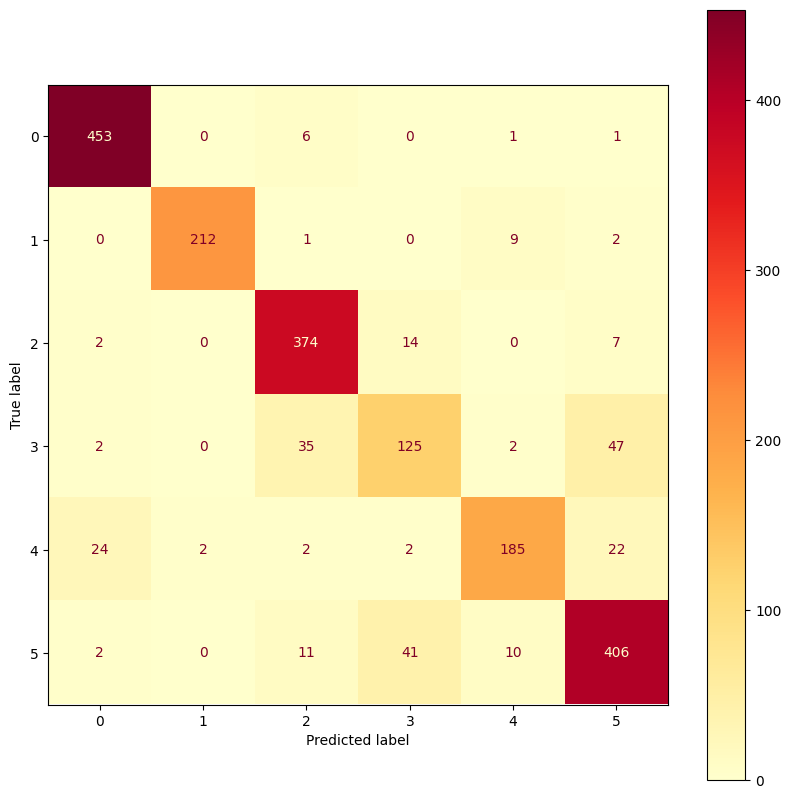

In [88]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fix, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap = 'YlOrRd')

This model seems about as accurate as the previous one, with a score of 88%. The precision and recall were similar as well.

Problem 3

In [89]:
df = pd.read_csv('/content/gdrive/MyDrive/banknote_authentication.csv')

In [106]:
X = df.drop('forgery', axis=1)
y = df['forgery']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
num_attribs = ['variance', 'skewness', 'curtosis', 'entropy']

In [107]:
col_transform = ColumnTransformer(transformers =[
                                  ('num', MinMaxScaler(), num_attribs)],
                                  remainder='passthrough'
)

In [112]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('rf',RandomForestClassifier(n_estimators=1000, max_samples=1000, bootstrap=True, n_jobs=-1))
                     ])

In [113]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('rf',
                 RandomForestClassifier(max_samples=1000, n_estimators=1000,
                                        n_jobs=-1))])

In [114]:
y_pred = pipeline.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



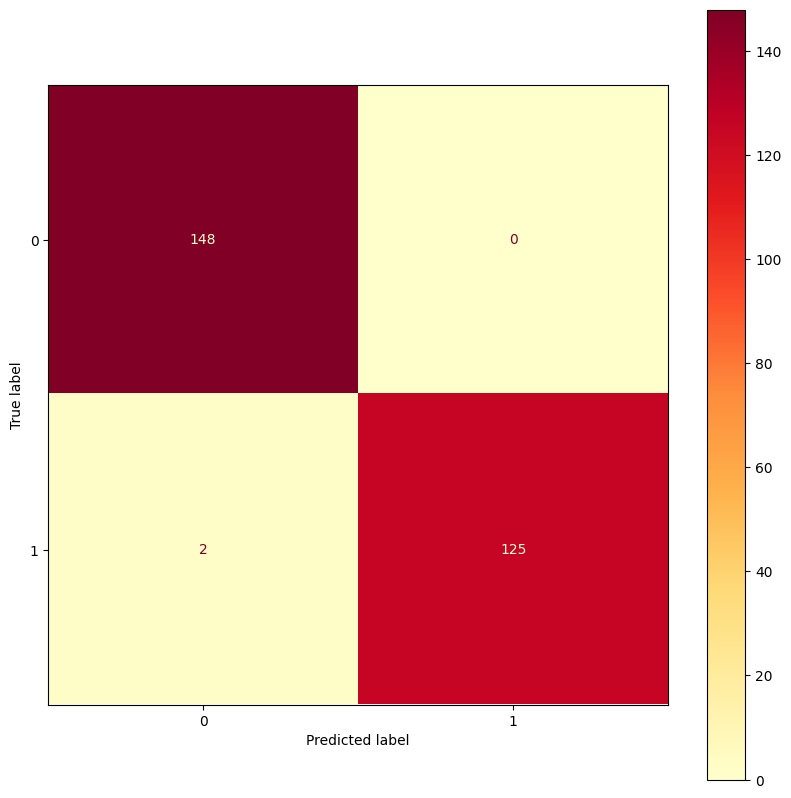

In [115]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fix, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap = 'YlOrRd')

This model seems very good for predicting if a bank note is a forgery or not. There were only 2 instances where it predicted a forgery when it was real. With an accuracy of 99%, it would be right almost all the time.